In [39]:
#Import Block

import numpy as np
import matplotlib
from matplotlib import pyplot as plt
%matplotlib inline
import pylab as lab
import sys
import time
from specutils import Spectrum1D
import astropy.units as u
from specutils.manipulation import (box_smooth, gaussian_smooth, trapezoid_smooth)
He = False
HeII = False
varHe = "Untestable"
varHeII = "Untestable"
print ("import done")
fileName = 'wisej1856_090721_merged.txt'
print ("""Star Guesses:
TYC 3740-1791-1: EM candiate, A Star Guess
WISE J185608.58-163255.1: Cool Candidate, G Star Guess
WISE J194127.64+385155.3: Cool Candidate, K Star Guess
TYC 2670-214-1 EM Candidate, A or F Star Guess""")

import done
Star Guesses:
TYC 3740-1791-1: EM candiate, A Star Guess
WISE J185608.58-163255.1: Cool Candidate, G Star Guess
WISE J194127.64+385155.3: Cool Candidate, K Star Guess
TYC 2670-214-1 EM Candidate, A or F Star Guess


In [18]:
    #File Set Up Block

tyc2670 = 'tyc2670_090721_merged-Copy1.txt'
tyc3740 = 'tyc3740_091021_merged-Copy1.txt'
wisej1856 ='wisej1856_090721_merged-Copy1.txt'
wisej1941 = 'wisej1941_090721_merged-Copy1.txt'




    
def fileSetup(fileName,guassFactor):
        global waves
        global fluxs
        global spec1_gsmooth
        global spec1_bsmooth
        global spec1_tsmooth
        global spec1d
        global fileTitle
        
       
        
        waves,fluxs,_ = np.genfromtxt(fileName,unpack=True)

    
        spec1d = Spectrum1D(spectral_axis=waves*u.AA, flux = fluxs*u.Jy)

        spec1_bsmooth = box_smooth(spec1d, width=3)
        spec1_gsmooth = gaussian_smooth(spec1d, stddev=guassFactor)
        spec1_tsmooth = trapezoid_smooth(spec1d, width=3)
        print ("Do you want to give '", fileName,"'a nickname?")
        time.sleep(1)
        wantNickName =(input("Yes/No"))
        if wantNickName == "Yes":
            nickName = (input("Enter your nickname for this star"))
            fileName = nickName
            fileTitle = fileName
        if wantNickName == "No":
            fileTitle = fileName
        else:
            fileTitle = fileName

        print("file set up done")
        return waves
        return fluxs
        return spec1_gsmooth
        return fileTitle

In [19]:
def bunny():
    print(""" Have a bunny             
                      (\___/)
                      (=^.^=)
                      (")_(")   """)

In [20]:
CaTriplet3Wave=866.2 
CaTriplet2Wave=854.2
CaTriplet1Wave=849.8
H_AlphaWave=656.3
NaDoublet2Wave=589.5
NaDoublet1Wave=589.0
H_BetaWave=486.1
H_GammaWave=434.0
G_BandWave=430.8
FeWave=432.5

def ListofSpectralFeatures():
    print("""
CaTriplet3Wave=866.2 
CaTriplet2Wave=854.2
CaTriplet1Wave=849.8
H_AlphaWave=656.3
NaDoublet2Wave=589.5
NaDoublet1Wave=589.0
H_BetaWave=486.1
H_GammaWave=434.0
G_BandWave=430.8
FeWave=432.5
""")


In [36]:
 def fullSpectra(wave,flux,spec1_gsmooth,Focus,starGuess,lw,leftLim,rightLim):   
    x = wave
    y = flux

    global title
    global waveG
    global fluxG
    focus=Focus
    title1 = starGuess + " Candidate "+fileTitle+" "+focus
    title2 = title1+" (Smoothed)"
    fig, axes = plt.subplots(2, 1, figsize=(16, 10),dpi=300)
    axes[0].set_title(title1,color='C3')
    axes[0].set_xlabel("Wave") 
    axes[0].set_ylabel("Flux") 
    axes[0].plot(wave,flux,color='green')
    axes[0].axvline(x=CaTriplet3Wave,color="darkviolet",linewidth=lw)#Ca Triplet 3
    axes[0].axvline(x=CaTriplet2Wave,color="darkviolet",linewidth=lw)#Ca Triplet 2
    axes[0].axvline(x=CaTriplet1Wave,color="darkviolet",linewidth=lw)#Ca Triplet 1
    axes[0].text(868,0.4,"Ca Triplet" ,color ="darkviolet")
    axes[0].axvline(x=H_AlphaWave,color="indigo",linewidth=lw,)#Ha
    axes[0].text(656.5,0.3, " H-α",color="indigo")
    axes[0].axvline(x=NaDoublet2Wave,color="RoyalBlue",linewidth=lw)#Na Doublet 2
    axes[0].axvline(x=NaDoublet1Wave,color="RoyalBlue",linewidth=lw)#Na Doublet 1
    axes[0].text(590,0.3,"Na Doublet", color ="RoyalBlue")
    axes[0].axvline(x=H_BetaWave,color="ForestGreen",linewidth=lw)#Hb
    axes[0].text(486.5,0.3, "H-β", color="ForestGreen")
    axes[0].axvline(x=H_GammaWave,color="GoldenRod",linewidth=lw)#Hg
    axes[0].text(434.0,0.1, "H-γ", color="GoldenRod") 
    axes[0].axvline(x=G_BandWave,color="Red",linewidth=lw)# G-Band(?)
    axes[0].text(408.0,0.15,"G-band",color="Red") # double check this is actually the g-band
    axes[0].axvline(x=FeWave,color="Magenta",linewidth=lw)#Fe
    axes[0].text(433,0.2,"Fe 432.5",color="Magenta") 
    axes[0].set_xlim(leftLim,rightLim)
    axes[0].set_xlim(875,900)
    axes[0].set_xlim(820,860)
    axes[0].axvline(x=1043,color="darkviolet",linewidth=lw)
    plt.tight_layout()
    axes[1].set_title(title2, color='teal')
    
    axes[1].axvline(x=CaTriplet3Wave,color="darkviolet",linewidth=lw)#Ca Triplet 3
    axes[1].axvline(x=CaTriplet2Wave,color="darkviolet",linewidth=lw)#Ca Triplet 2
    axes[1].axvline(x=CaTriplet1Wave,color="darkviolet",linewidth=lw)#Ca Triplet 1
    axes[1].text(868,0.5,"Ca Triplet" ,color ="darkviolet")
    axes[1].axvline(x=H_AlphaWave,color="indigo",linewidth=lw,)#Ha
    axes[1].text(656.5,0.4, " H-α",color="indigo")
    axes[1].axvline(x=NaDoublet2Wave,color="RoyalBlue",linewidth=lw)#Na Doublet 2
    axes[1].axvline(x=NaDoublet1Wave,color="RoyalBlue",linewidth=lw)#Na Doublet 1
    axes[1].text(590,0.7,"Na Doublet", color ="RoyalBlue")
    axes[1].axvline(x=H_BetaWave,color="ForestGreen",linewidth=lw)#Hb
    axes[1].text(486.5,0.4, "H-β", color="ForestGreen")
    axes[1].axvline(x=H_GammaWave,color="GoldenRod",linewidth=lw)#Hg
    axes[1].text(434.0,0.3, "H-γ", color="GoldenRod") 
    axes[1].axvline(x=G_BandWave,color="Red",linewidth=lw)# G-Band(?)
    axes[1].text(408.0,0.35,"G-band",color="Red") # double check this is actually the g-band
    axes[1].axvline(x=FeWave,color="Magenta",linewidth=lw)#Fe
    axes[1].text(433,0.4,"Fe 432.5",color="Magenta") 
    
    
    axes[1].set_xlabel("Wave") 
    axes[1].set_ylabel("Flux") 

    axes[1].plot(spec1_gsmooth.spectral_axis, spec1_gsmooth.flux)  
    axes[1].set_xlim(leftLim,rightLim)#emission line zoom in one
    #axes[1].set_xlim(625,635)#emission line zoom in two
    #axes[1].set_xlim(875,900)#emission line zoom in 3
   # axes[1].axvline(x=1043,color="darkviolet",linewidth=0.75,ls="dashed")
    plt.tight_layout()
    plt.savefig("Star_Plot.pdf",bbox_inches="tight")
    
    waveG = spec1_gsmooth.spectral_axis
    fluxG = spec1_gsmooth.flux
    #return waveG 
    #return fluxG
    #return lw
    #return title

In [27]:
fileSetup(tyc2670,24)


Do you want to give ' tyc2670_090721_merged-Copy1.txt 'a nickname?


Yes/No No


file set up done


array([          nan,  355.95695029,  355.96264032, ..., 1041.86116016,
       1041.87606134, 1041.89096253])

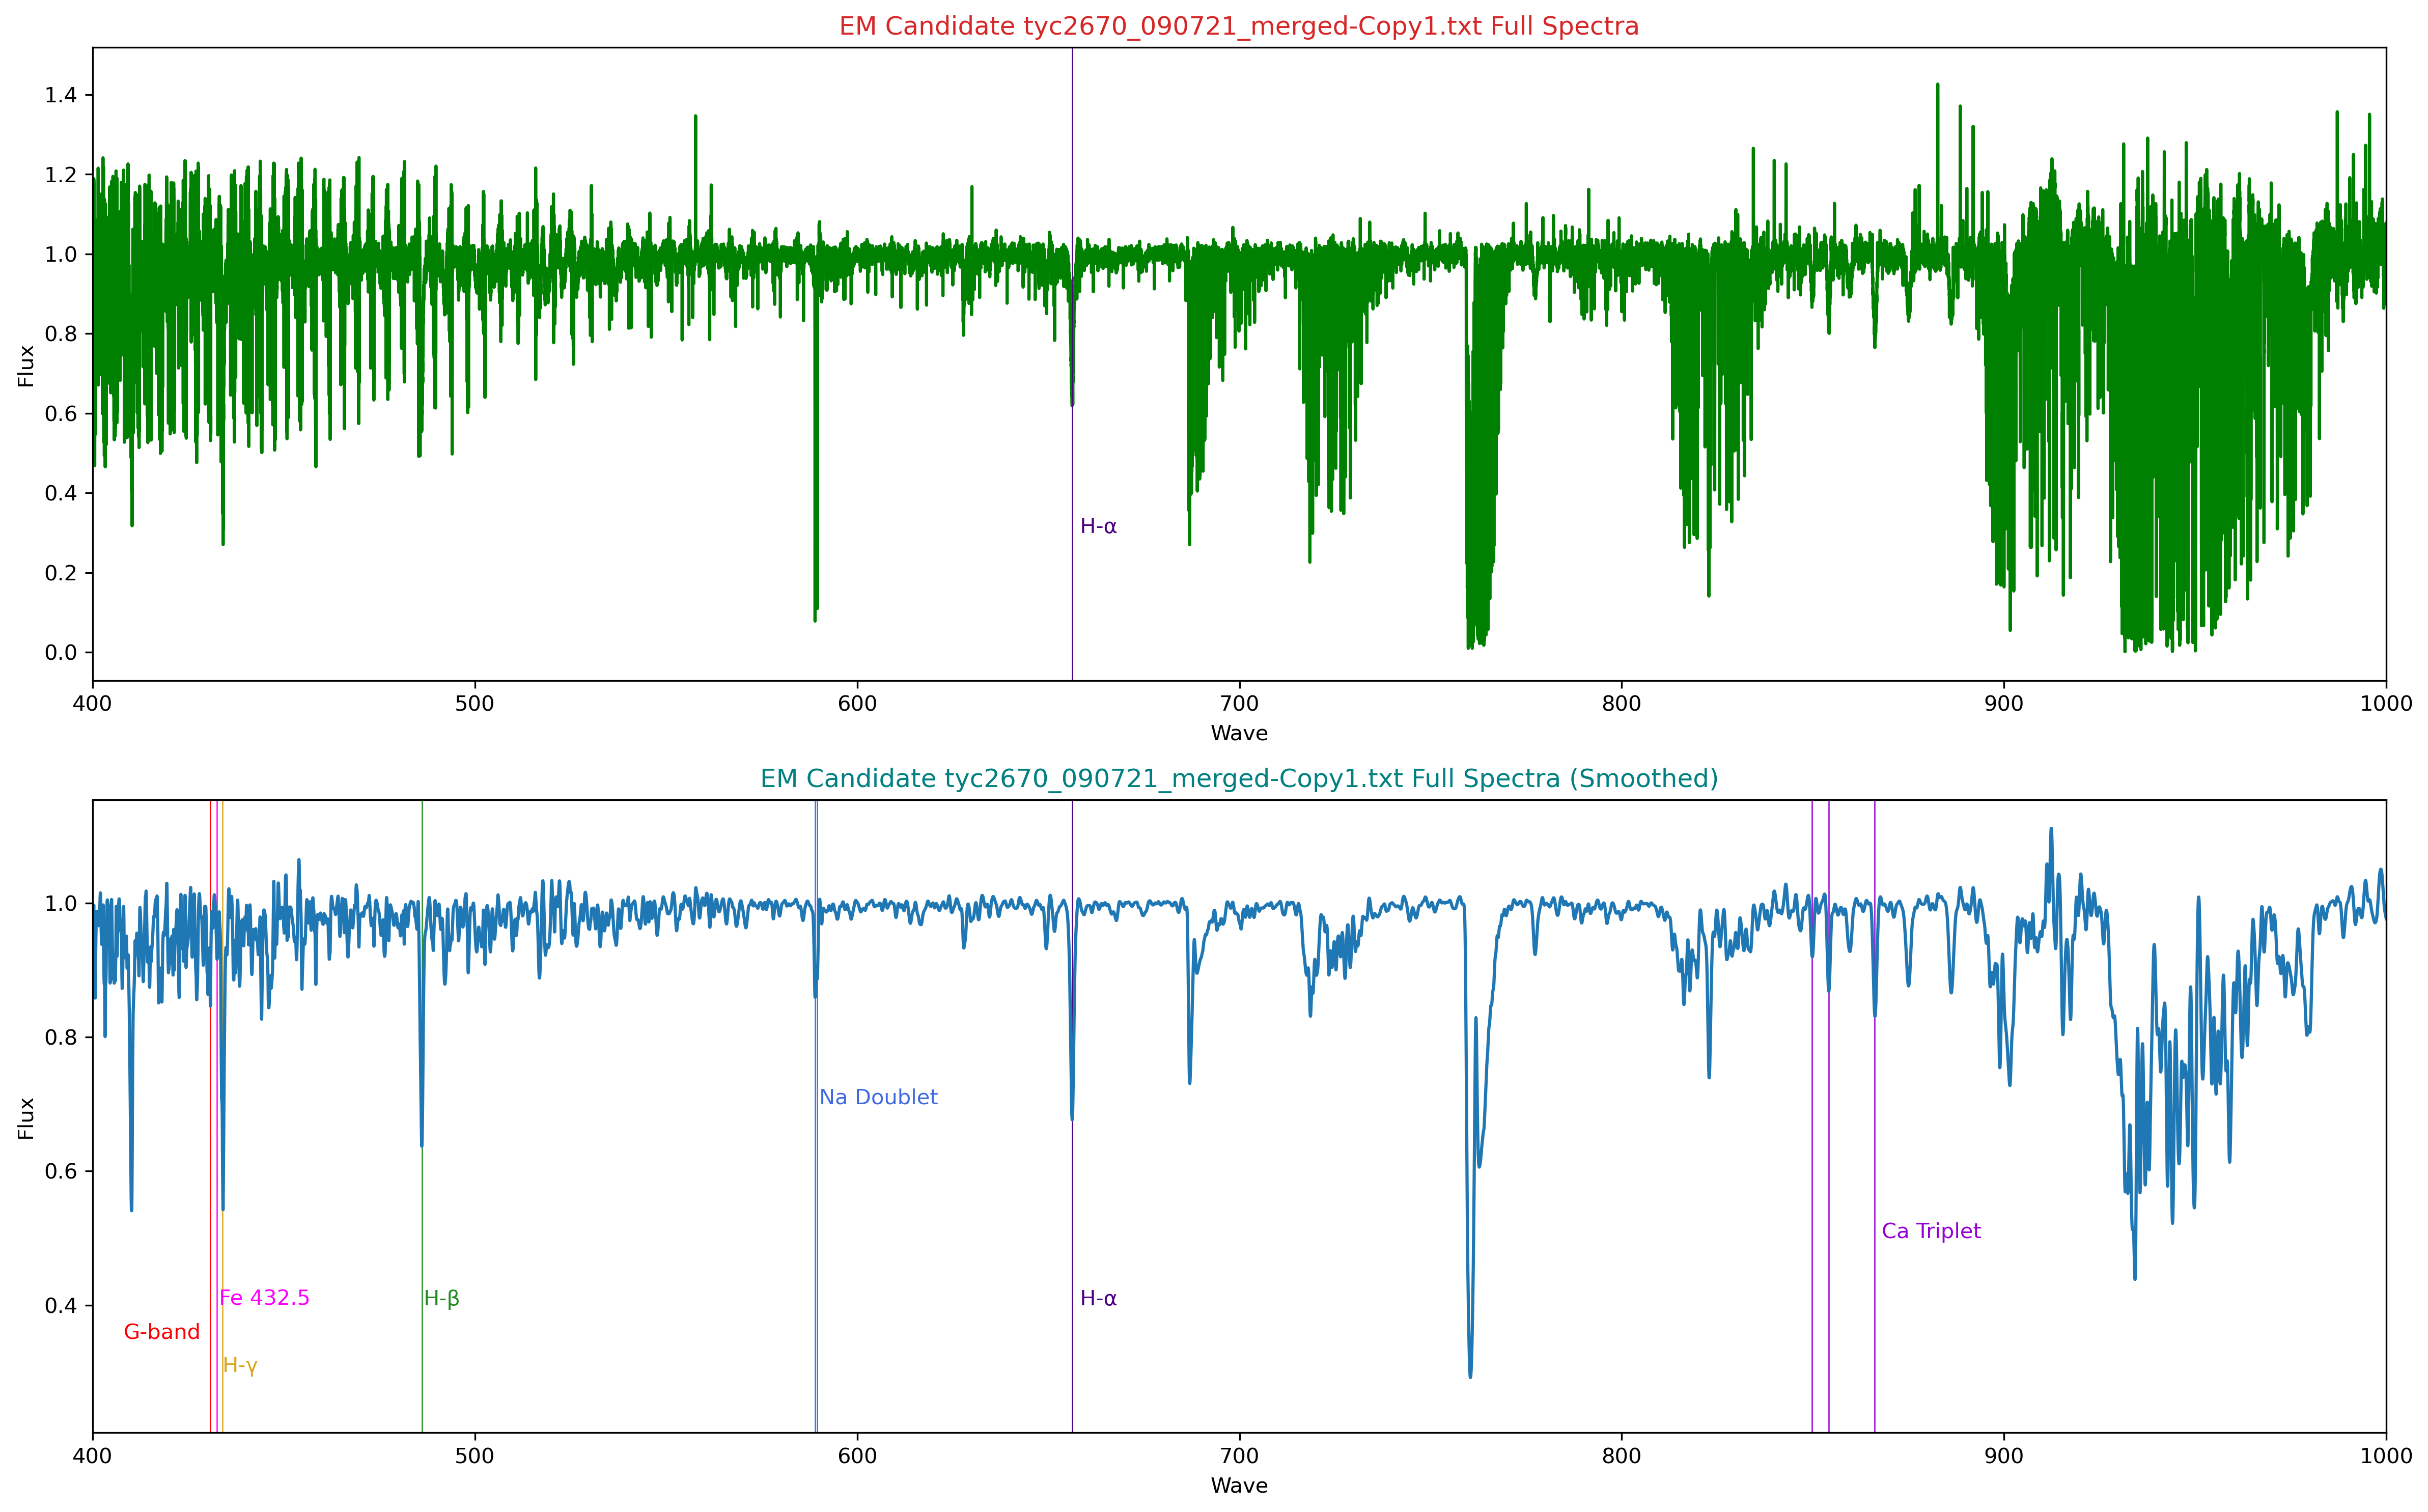

In [28]:
fullSpectra(waves,fluxs,spec1_gsmooth,"Full Spectra","EM",0.6,400,1000)

In [37]:
def RapidChartSpitter(fileName,guassFactor,wave,flux,spec1_gsmooth,Focus,starGuess,lw,leftLim,rightLim):
    fileSetup(fileName,guassFactor)
    fullSpectra(waves,fluxs,spec1_gsmooth,Focus,starGuess,lw,leftLim,rightLim)
currentFocus = "Full Spectra"
leftBound = 300
rightBound = 1100
RapidChartSpitter(tyc2670,21,waves,fluxs,spec1_gsmooth,currentFocus,'EM',0.5,leftBound,rightBound)
RapidChartSpitter(tyc3740,21,waves,fluxs,spec1_gsmooth,currentFocus,'EM',0.5,leftBound,rightBound)
RapidChartSpitter(wisej1856,21,waves,fluxs,spec1_gsmooth,currentFocus,'Cool',0.5,leftBound,rightBound)
RapidChartSpitter(wisej1941,21,waves,fluxs,spec1_gsmooth,currentFocus,'Cool',0.5,leftBound,rightBound)
bunny()

Do you want to give ' tyc2670_090721_merged-Copy1.txt 'a nickname?


Yes/No Yes
Enter your nickname for this star TYC 2670


file set up done


C:\Users\ishan\AppData\Local\Temp/ipykernel_14448/981085806.py:37: UserWarning: Tight layout not applied. The left and right margins cannot be made large enough to accommodate all axes decorations. 
  plt.tight_layout()
C:\Users\ishan\AppData\Local\Temp/ipykernel_14448/981085806.py:67: UserWarning: Tight layout not applied. The left and right margins cannot be made large enough to accommodate all axes decorations. 
  plt.tight_layout()


Do you want to give ' tyc3740_091021_merged-Copy1.txt 'a nickname?


KeyboardInterrupt: Interrupted by user

In [25]:
#TiO Line Test Block
#takes wave and flux, returns if TiO line are present or not  
def TiO_Line_Test (wave,flux,waveG,fluxG,Title): 
    x = wave
    y = flux
    title1 = Title+" TiO Lines"
    title2 = Title+" TiO Lines (Gaussian Smooth)
    fig, axes = plt.subplots(2, 1, figsize=(16, 10),dpi=300)
    axes[0].set_title()
    
    axes[0].axvline(x=656.3,color="darkviolet",linewidth=lw,)
    axes[0].text(656.5,0.4, " H-α", fontsize = 12)
    axes[0].axvline(x=486.1,color="darkviolet",linewidth=lw)
    axes[0].text(486.3,0.4, "H-β")
    axes[0].axvline(x=434.0,color="Black",linewidth=lw)
    axes[0].text(434.0,0.35, "H-γ")
    axes[0].axvline(x=849.8,color="darkviolet",linewidth=lw)
    axes[0].axvline(x=854.2,color="darkviolet",linewidth=lw)
    axes[0].axvline(x=866.2,color="darkviolet",linewidth=lw)
    axes[0].text(848,0.8,"Ca Triplet ")
    axes[0].axvline(x=589.0,color="red",linewidth=lw)
    axes[0].axvline(x=589.5,color="red",linewidth=lw)
    axes[0].text(580,0.8,"Na Doublet ")
    axes[0].axvline(x=430.8,color="violet",linewidth=lw)
    axes[0].text(430.8,0.5,"G-band",color="violet") # double check this is actually the g-band
    axes[0].axvline(x=432.5,color="Red",linewidth=lw)
    axes[0].text(433,0.4,"Fe 432.5",color="Red") 
    
    axes[0].set_xlabel("Wave") 
    axes[0].set_ylabel("flux") 
    axes[0].plot(wave,flux)
    axes[0].set_xlim(355,1043)
    axes[0].axvline(x=1043,color="darkviolet",linewidth=0.5,ls="dashed")
    plt.tight_layout()
    
    axes[1].set_title("TiO Lines (Zoomed In)")
    axes[1].set_xlabel("Wave") 
    axes[1].set_ylabel("flux") 
    axes[1].plot(waveG,fluxG)
    
    axes[1].axvline(x=656.3,color="darkviolet",linewidth=lw,)
    axes[1].text(656.5,0.4, " H-α")
    axes[1].axvline(x=486.1,color="darkviolet",linewidth=lw)
    axes[1].text(486.3,0.4, "H-β")
    axes[1].axvline(x=434.0,color="Black",linewidth=lw)
    axes[1].text(434.0,0.35, "H-γ")
    axes[1].axvline(x=849.8,color="darkviolet",linewidth=lw)
    axes[1].axvline(x=854.2,color="darkviolet",linewidth=lw)
    axes[1].axvline(x=866.2,color="darkviolet",linewidth=lw)
    axes[1].text(848,0.8,"Ca Triplet ")
    axes[1].axvline(x=589.0,color="red",linewidth=lw)
    axes[1].axvline(x=589.5,color="red",linewidth=lw)
    axes[1].text(580,0.8,"Na Doublet ")
    axes[1].axvline(x=430.8,color="violet",linewidth=lw)
    axes[1].text(430.8,0.5,"G-band",color="violet") # double check this is actually the g-band
    axes[1].axvline(x=432.5,color="Red",linewidth=lw)
    axes[1].text(433,0.4,"Fe 432.5",color="Red") 
    
    axes[1].set_xlim(355,1043)
    axes[1].axvline(x=1043,color="darkviolet",linewidth=0.75,ls="dashed")
    plt.tight_layout()
    plt.show()
    

    varTioLines =(input("Are TiO lines present (Hint: look for bites missing)? Yes/No"))
    global TiOLines
    if varTioLines == "No" :
        TiOLines = False
        print ("Cool! Now let's take a look at the Calcium Triplet...")

    if varTioLines == "Yes":
        TiOLines = True
        print("Huh, are you sure? lets look at the Calcium Triplet jsut to be sure!")
        #sys.exit ("End of program. Have a nice day!")
        
    print (TiOLines)

SyntaxError: EOL while scanning string literal (Temp/ipykernel_3416/1064564330.py, line 7)

In [ ]:
#Calcium Triplet Test Block
#takes wave and flux, returns if Calcium triplets are present or not  
def Calcium_Triplet_Test (wave,flux,waveG,fluxG,Title):
    fig, axes = plt.subplots(8, 1, figsize=(16, 10),dpi=300)
    axes[0].set_title("Calcium Triplet (All)")
    axes[0].set_xlabel("Wave") 
    axes[0].set_ylabel("flux") 
    axes[0].plot(wave,flux) 
    axes[0].set_xlim(834.8,881.2)
    
    axes[0].axvline(x=656.3,color="darkviolet",linewidth=lw,)
    axes[0].text(656.5,0.4, " H-α")
    axes[0].axvline(x=486.1,color="darkviolet",linewidth=lw)
    axes[0].text(486.3,0.4, "H-β")
    axes[0].axvline(x=434.0,color="Black",linewidth=lw)
    axes[0].text(434.0,0.35, "H-γ")
    axes[0].axvline(x=849.8,color="darkviolet",linewidth=lw)
    axes[0].axvline(x=854.2,color="darkviolet",linewidth=lw)
    axes[0].axvline(x=866.2,color="darkviolet",linewidth=lw)
    axes[0].text(848,0.8,"Ca Triplet ")
    axes[0].axvline(x=589.0,color="red",linewidth=lw)
    axes[0].axvline(x=589.5,color="red",linewidth=lw)
    axes[0].text(580,0.8,"Na Doublet ")
    axes[0].axvline(x=430.8,color="violet",linewidth=lw)
    axes[0].text(430.8,0.5,"G-band",color="violet") # double check this is actually the g-band
    axes[0].axvline(x=432.5,color="Red",linewidth=lw)
    axes[0].text(433,0.4,"Fe 432.5",color="Red") 
    
    axes[0].axvline(x=849.8,color="red",linewidth=0.5,ls="dashed")
    axes[0].axvline(x=854.2,color="forestgreen",linewidth=0.5,ls="dashed")
    axes[0].axvline(x=866.2,color="royalblue",linewidth=0.5,ls="dashed")
    
    axes[1].set_title("Calcium Triplet (All) (Gaussian Smooth)")
    axes[1].set_xlabel("Wave") 
    axes[1].set_ylabel("flux") 
    axes[1].plot(waveG,fluxG) 
    axes[1].set_xlim(834.8,881.2)
    
    axes[1].axvline(x=656.3,color="darkviolet",linewidth=lw,)
    axes[1].text(656.5,0.4, " H-α")
    axes[1].axvline(x=486.1,color="darkviolet",linewidth=lw)
    axes[1].text(486.3,0.4, "H-β")
    axes[1].axvline(x=434.0,color="Black",linewidth=lw)
    axes[1].text(434.0,0.35, "H-γ")
    axes[1].axvline(x=849.8,color="darkviolet",linewidth=lw)
    axes[1].axvline(x=854.2,color="darkviolet",linewidth=lw)
    axes[1].axvline(x=866.2,color="darkviolet",linewidth=lw)
    axes[1].text(848,0.8,"Ca Triplet ")
    axes[1].axvline(x=589.0,color="red",linewidth=lw)
    axes[1].axvline(x=589.5,color="red",linewidth=lw)
    axes[1].text(580,0.8,"Na Doublet ")
    axes[1].axvline(x=430.8,color="violet",linewidth=lw)
    axes[1].text(430.8,0.5,"G-band",color="violet") # double check this is actually the g-band
    axes[1].axvline(x=432.5,color="Red",linewidth=lw)
    axes[1].text(433,0.4,"Fe 432.5",color="Red") 
    
    axes[1].axvline(x=849.8,color="red",linewidth=0.5,ls="dashed")
    axes[1].axvline(x=854.2,color="forestgreen",linewidth=0.5,ls="dashed")
    axes[1].axvline(x=866.2,color="royalblue",linewidth=0.5,ls="dashed")
    
    axes[2].set_title("Calcium Triplet (849.8)")
    axes[2].set_xlabel("Wave") 
    axes[2].set_ylabel("flux") 
    axes[2].plot(wave,flux) 
    axes[2].set_xlim(844.8,854.8)
    
    axes[2].axvline(x=656.3,color="darkviolet",linewidth=lw,)
    axes[2].text(656.5,0.4, " H-α")
    axes[2].axvline(x=486.1,color="darkviolet",linewidth=lw)
    axes[2].text(486.3,0.4, "H-β")
    axes[2].axvline(x=434.0,color="Black",linewidth=lw)
    axes[2].text(434.0,0.35, "H-γ")
    axes[2].axvline(x=849.8,color="darkviolet",linewidth=lw)
    axes[2].axvline(x=854.2,color="darkviolet",linewidth=lw)
    axes[2].axvline(x=866.2,color="darkviolet",linewidth=lw)
    axes[2].text(848,0.8,"Ca Triplet ")
    axes[2].axvline(x=589.0,color="red",linewidth=lw)
    axes[2].axvline(x=589.5,color="red",linewidth=lw)
    axes[2].text(580,0.8,"Na Doublet ")
    axes[2].axvline(x=430.8,color="violet",linewidth=lw)
    axes[2].text(430.8,0.5,"G-band",color="violet") # double check this is actually the g-band
    axes[2].axvline(x=432.5,color="Red",linewidth=lw)
    axes[2].text(433,0.4,"Fe 432.5",color="Red") 
    
    axes[2].axvline(x=849.8,color="darkviolet",linewidth=0.5,ls="dashed")
    
    axes[3].set_title("Calcium Triplet (849.8)(Gaussian Smooth)")
    axes[3].set_xlabel("Wave") 
    axes[3].set_ylabel("flux") 
    axes[3].plot(waveG,fluxG) 
    axes[3].set_xlim(844.8,854.8)
    
    axes[2].axvline(x=656.3,color="darkviolet",linewidth=lw,)
    axes[2].text(656.5,0.4, " H-α")
    axes[2].axvline(x=486.1,color="darkviolet",linewidth=lw)
    axes[2].text(486.3,0.4, "H-β")
    axes[2].axvline(x=434.0,color="Black",linewidth=lw)
    axes[2].text(434.0,0.35, "H-γ")
    axes[2].axvline(x=849.8,color="darkviolet",linewidth=lw)
    axes[2].axvline(x=854.2,color="darkviolet",linewidth=lw)
    axes[2].axvline(x=866.2,color="darkviolet",linewidth=lw)
    axes[2].text(848,0.8,"Ca Triplet ")
    axes[2].axvline(x=589.0,color="red",linewidth=lw)
    axes[2].axvline(x=589.5,color="red",linewidth=lw)
    axes[2].text(580,0.8,"Na Doublet ")
    axes[2].axvline(x=430.8,color="violet",linewidth=lw)
    axes[2].text(430.8,0.5,"G-band",color="violet") # double check this is actually the g-band
    axes[2].axvline(x=432.5,color="Red",linewidth=lw)
    axes[2].text(433,0.4,"Fe 432.5",color="Red") 
    
    axes[3].axvline(x=849.8,color="darkviolet",linewidth=0.5,ls="dashed")
    
    axes[4].set_title("Calcium Triplet (854.2)")
    axes[4].set_xlabel("Wave") 
    axes[4].set_ylabel("flux") 
    axes[4].plot(wave,flux) 
    axes[4].set_xlim(849.2,859.2)
    
    axes[4].axvline(x=656.3,color="darkviolet",linewidth=lw,)
    axes[4].text(656.5,0.4, " H-α")
    axes[4].axvline(x=486.1,color="darkviolet",linewidth=lw)
    axes[4].text(486.3,0.4, "H-β")
    axes[4].axvline(x=434.0,color="Black",linewidth=lw)
    axes[4].text(434.0,0.35, "H-γ")
    axes[4].axvline(x=849.8,color="darkviolet",linewidth=lw)
    axes[4].axvline(x=854.2,color="darkviolet",linewidth=lw)
    axes[4].axvline(x=866.2,color="darkviolet",linewidth=lw)
    axes[4].text(848,0.8,"Ca Triplet ")
    axes[4].axvline(x=589.0,color="red",linewidth=lw)
    axes[4].axvline(x=589.5,color="red",linewidth=lw)
    axes[4].text(580,0.8,"Na Doublet ")
    axes[4].axvline(x=430.8,color="violet",linewidth=lw)
    axes[4].text(430.8,0.5,"G-band",color="violet") # double check this is actually the g-band
    axes[4].axvline(x=432.5,color="Red",linewidth=lw)
    axes[4].text(433,0.4,"Fe 432.5",color="Red") 
    
    axes[4].axvline(x=854.2,color="darkviolet",linewidth=0.5,ls="dashed")
    
    axes[5].set_title("Calcium Triplet (854.2)(Gaussian Smooth) (Gaussian Smooth)")
    axes[5].set_xlabel("Wave") 
    axes[5].set_ylabel("flux") 
    axes[5].plot(waveG,fluxG) 
    axes[5].set_xlim(849.2,859.2)
    
    axes[5].axvline(x=656.3,color="darkviolet",linewidth=lw,)
    axes[5].text(656.5,0.4, " H-α")
    axes[5].axvline(x=486.1,color="darkviolet",linewidth=lw)
    axes[5].text(486.3,0.4, "H-β")
    axes[5].axvline(x=434.0,color="Black",linewidth=lw)
    axes[5].text(434.0,0.35, "H-γ")
    axes[5].axvline(x=849.8,color="darkviolet",linewidth=lw)
    axes[5].axvline(x=854.2,color="darkviolet",linewidth=lw)
    axes[5].axvline(x=866.2,color="darkviolet",linewidth=lw)
    axes[5].text(848,0.8,"Ca Triplet ")
    axes[5].axvline(x=589.0,color="red",linewidth=lw)
    axes[5].axvline(x=589.5,color="red",linewidth=lw)
    axes[5].text(580,0.8,"Na Doublet ")
    axes[5].axvline(x=430.8,color="violet",linewidth=lw)
    axes[5].text(430.8,0.5,"G-band",color="violet") # double check this is actually the g-band
    axes[5].axvline(x=432.5,color="Red",linewidth=lw)
    axes[5].text(433,0.4,"Fe 432.5",color="Red") 
    
    axes[5].axvline(x=854.2,color="darkviolet",linewidth=0.5,ls="dashed")
    
    axes[6].set_title("Calcium Triplet(866.2)")
    axes[6].set_xlabel("Wave") 
    axes[6].set_ylabel("flux") 
    axes[6].plot(wave,flux) 
    axes[6].set_xlim(861.2,871.2)
    
    axes[6].axvline(x=656.3,color="darkviolet",linewidth=lw,)
    axes[6].text(656.5,0.4, " H-α")
    axes[6].axvline(x=486.1,color="darkviolet",linewidth=lw)
    axes[6].text(486.3,0.4, "H-β")
    axes[6].axvline(x=434.0,color="Black",linewidth=lw)
    axes[6].text(434.0,0.35, "H-γ")
    axes[6].axvline(x=849.8,color="darkviolet",linewidth=lw)
    axes[6].axvline(x=854.2,color="darkviolet",linewidth=lw)
    axes[6].axvline(x=866.2,color="darkviolet",linewidth=lw)
    axes[6].text(848,0.8,"Ca Triplet ")
    axes[6].axvline(x=589.0,color="red",linewidth=lw)
    axes[6].axvline(x=589.5,color="red",linewidth=lw)
    axes[6].text(580,0.8,"Na Doublet ")
    axes[6].axvline(x=430.8,color="violet",linewidth=lw)
    axes[6].text(430.8,0.5,"G-band",color="violet") # double check this is actually the g-band
    axes[6].axvline(x=432.5,color="Red",linewidth=lw)
    axes[6].text(433,0.4,"Fe 432.5",color="Red") 
    
    axes[6].axvline(x=866.2,color="darkviolet",linewidth=0.5,ls="dashed")
    
    axes[7].set_title("Calcium Triplet(866.2) (Gaussian Smooth)")
    axes[7].set_xlabel("Wave") 
    axes[7].set_ylabel("flux") 
    axes[7].plot(waveG,fluxG) 
    axes[7].set_xlim(861.2,871.2)
    
    axes[7].axvline(x=656.3,color="darkviolet",linewidth=lw,)
    axes[7].text(656.5,0.4, " H-α")
    axes[7].axvline(x=486.1,color="darkviolet",linewidth=lw)
    axes[7].text(486.3,0.4, "H-β")
    axes[7].axvline(x=434.0,color="Black",linewidth=lw)
    axes[7].text(434.0,0.35, "H-γ")
    axes[7].axvline(x=849.8,color="darkviolet",linewidth=lw)
    axes[7].axvline(x=854.2,color="darkviolet",linewidth=lw)
    axes[7].axvline(x=866.2,color="darkviolet",linewidth=lw)
    axes[7].text(848,0.8,"Ca Triplet ")
    axes[7].axvline(x=589.0,color="red",linewidth=lw)
    axes[7].axvline(x=589.5,color="red",linewidth=lw)
    axes[7].text(580,0.8,"Na Doublet ")
    axes[7].axvline(x=430.8,color="violet",linewidth=lw)
    axes[7].text(430.8,0.5,"G-band",color="violet") # double check this is actually the g-band
    axes[7].axvline(x=432.5,color="Red",linewidth=lw)
    axes[7].text(433,0.4,"Fe 432.5",color="Red") 
    
    axes[7].axvline(x=866.2,color="darkviolet",linewidth=0.5,ls="dashed")
    plt.show()

    varCaTriplet =(input("Are the Calcium Triplet present? Yes/No"))
    global strongCaTriplet 
    if varCaTriplet == "Yes" :
        strongCaTriplet = True
        print ("Alright, it's probably a Cool star so expect balmer lines not to be dominant. It's likely a G, K or M star. If Balmmer lines are dominant It's probably an F star")
        #dominantBalmer = False 
    else: 
        if varCaTriplet == "No" :
            #dominantBalmer = True
            strongCaTriplet = False
            print ("Hmmm, in that case this likley a Hot star in which case balmer lines are likey dominant. It is also likely not a G or K or M star and possibly an F star")

        else:
            #sys.exit ("Error, not a valid response. Pls resart program.")
            print ("error")
        
        

In [ ]:
#Sodium Test Block
#takes wave and flux, returns if Calcium triplets are present or not  
def Sodium_Test (wave,flux,waveG,fluxG,Title):
    fig, axes = plt.subplots(2, 1, figsize=(16, 10),dpi=300)
    axes[0].set_title("Sodium (All)")
    axes[0].set_xlabel("Wave") 
    axes[0].set_ylabel("flux") 
    axes[0].plot(wave,flux) 
    axes[0].set_xlim(575,585)
    
    axes[0].axvline(x=656.3,color="darkviolet",linewidth=lw,)
    axes[0].text(656.5,0.4, " H-α")
    axes[0].axvline(x=486.1,color="darkviolet",linewidth=lw)
    axes[0].text(486.3,0.4, "H-β")
    axes[0].axvline(x=434.0,color="Black",linewidth=lw)
    axes[0].text(434.0,0.35, "H-γ")
    axes[0].axvline(x=849.8,color="darkviolet",linewidth=lw)
    axes[0].axvline(x=854.2,color="darkviolet",linewidth=lw)
    axes[0].axvline(x=866.2,color="darkviolet",linewidth=lw)
    axes[0].text(848,0.8,"Ca Triplet ")
    axes[0].axvline(x=589.0,color="red",linewidth=lw)
    axes[0].axvline(x=589.5,color="red",linewidth=lw)
    axes[0].text(580,0.8,"Na Doublet ")
    axes[0].axvline(x=430.8,color="violet",linewidth=lw)
    axes[0].text(430.8,0.5,"G-band",color="violet") # double check this is actually the g-band
    axes[0].axvline(x=432.5,color="Red",linewidth=lw)
    axes[0].text(433,0.4,"Fe 432.5",color="Red") 
    
    
    axes[0].axvline(x=589,color="red",linewidth=0.5,ls="dashed")
    axes[0].axvline(x=589.5,color="red",linewidth=0.5,ls="dashed")
    
    
    axes[1].set_title("Sodium (849.8) (Gaussian Smooth)")
    axes[1].set_xlabel("Wave") 
    axes[1].set_ylabel("flux") 
    axes[1].plot(waveG,fluxG) 
    axes[1].set_xlim(575,585)
    
    axes[1].axvline(x=656.3,color="darkviolet",linewidth=lw,)
    axes[1].text(656.5,0.4, " H-α")
    axes[1].axvline(x=486.1,color="darkviolet",linewidth=lw)
    axes[1].text(486.3,0.4, "H-β")
    axes[1].axvline(x=434.0,color="Black",linewidth=lw)
    axes[1].text(434.0,0.35, "H-γ")
    axes[1].axvline(x=849.8,color="darkviolet",linewidth=lw)
    axes[1].axvline(x=854.2,color="darkviolet",linewidth=lw)
    axes[1].axvline(x=866.2,color="darkviolet",linewidth=lw)
    axes[1].text(848,0.8,"Ca Triplet ")
    axes[1].axvline(x=589.0,color="red",linewidth=lw)
    axes[1].axvline(x=589.5,color="red",linewidth=lw)
    axes[1].text(580,0.8,"Na Doublet ")
    axes[1].axvline(x=430.8,color="violet",linewidth=lw)
    axes[1].text(430.8,0.5,"G-band",color="violet") # double check this is actually the g-band
    axes[1].axvline(x=432.5,color="Red",linewidth=lw)
    axes[1].text(433,0.4,"Fe 432.5",color="Red") 
    
    axes[1].axvline(x=589,color="darkviolet",linewidth=0.5,ls="dashed")
    axes[1].axvline(x=589.5,color="red",linewidth=0.5,ls="dashed")
   
    plt.show()

    varSodium =(input("Are the Calcium Triplet present? Yes/No"))
    global strongSodium
    if varSodium == "Yes" :
        strongCaTriplet = True
        print ("Alright, it's probably a Cool star so expect balmer lines not to be dominant. It's likely a G, K or M star. If Balmmer lines are dominant It's probably an F star")
        #dominantBalmer = False 
    else: 
        if varSodium == "No" :
            #dominantBalmer = True
            strongSodium = False
            print ("Hmmm, in that case this likley a Hot star in which case balmer lines are likey dominant. It is also likely not a G or K or M star and possibly an F star")

        else:
            #sys.exit ("Error, not a valid response. Pls resart program.")
            print ("error")
        
        

In [ ]:
#Balmer Line Test Block
#takes wave and flux and returns if balmer lines are strong and if balmer lines dominant
def Balmer_Line_Test (wave,flux,waveG,fluxG,Titlex):
    x = wave
    y = flux

    fig, axes = plt.subplots(6, 1, figsize=(16, 10),dpi=900)
    axes[0].set_title("Balmer Lines (Zoomed Out)")
    axes[0].set_xlabel("Wave") 
    axes[0].set_ylabel("flux") 
    axes[0].plot(wave,flux) 
    axes[0].set_xlim(616,696)
    
    axes[0].axvline(x=656.3,color="darkviolet",linewidth=lw,)
    axes[0].text(656.5,0.4, " H-α")
    axes[0].axvline(x=486.1,color="darkviolet",linewidth=lw)
    axes[0].text(486.3,0.4, "H-β")
    axes[0].axvline(x=434.0,color="Black",linewidth=lw)
    axes[0].text(434.0,0.35, "H-γ")
    axes[0].axvline(x=849.8,color="darkviolet",linewidth=lw)
    axes[0].axvline(x=854.2,color="darkviolet",linewidth=lw)
    axes[0].axvline(x=866.2,color="darkviolet",linewidth=lw)
    axes[0].text(848,0.8,"Ca Triplet ")
    axes[0].axvline(x=589.0,color="red",linewidth=lw)
    axes[0].axvline(x=589.5,color="red",linewidth=lw)
    axes[0].text(580,0.8,"Na Doublet ")
    axes[0].axvline(x=430.8,color="violet",linewidth=lw)
    axes[0].text(430.8,0.5,"G-band",color="violet") # double check this is actually the g-band
    axes[0].axvline(x=432.5,color="Red",linewidth=lw)
    axes[0].text(433,0.4,"Fe 432.5",color="Red") 
    
    axes[0].axvline(x=656.3,color="darkviolet",linewidth=0.5,ls="dashed")
    
    axes[1].set_title("Balmer Lines (Zoomed Out) (Gaussian Smooth)")
    axes[1].set_xlabel("Wave") 
    axes[1].set_ylabel("flux") 
    axes[1].plot(waveG,fluxG) 
    axes[1].set_xlim(616,696)
    
    axes[1].axvline(x=656.3,color="darkviolet",linewidth=lw,)
    axes[1].text(656.5,0.4, " H-α")
    axes[1].axvline(x=486.1,color="darkviolet",linewidth=lw)
    axes[1].text(486.3,0.4, "H-β")
    axes[1].axvline(x=434.0,color="Black",linewidth=lw)
    axes[1].text(434.0,0.35, "H-γ")
    axes[1].axvline(x=849.8,color="darkviolet",linewidth=lw)
    axes[1].axvline(x=854.2,color="darkviolet",linewidth=lw)
    axes[1].axvline(x=866.2,color="darkviolet",linewidth=lw)
    axes[1].text(848,0.8,"Ca Triplet ")
    axes[1].axvline(x=589.0,color="red",linewidth=lw)
    axes[1].axvline(x=589.5,color="red",linewidth=lw)
    axes[1].text(580,0.8,"Na Doublet ")
    axes[1].axvline(x=430.8,color="violet",linewidth=lw)
    axes[1].text(430.8,0.5,"G-band",color="violet") # double check this is actually the g-band
    axes[1].axvline(x=432.5,color="Red",linewidth=lw)
    axes[1].text(433,0.4,"Fe 432.5",color="Red") 
    
    axes[1].axvline(x=656.3,color="darkviolet",linewidth=0.5,ls="dashed")
    
    axes[2].set_title("Balmer Line H Alpha [636,676]")
    axes[2].set_xlabel("Wave") 
    axes[2].set_ylabel("flux") 
    axes[2].plot(waveG,fluxG) 
    axes[2].set_xlim(636,676)
    
    axes[2].axvline(x=656.3,color="darkviolet",linewidth=lw,)
    axes[2].text(656.5,0.4, " H-α")
    axes[2].axvline(x=486.1,color="darkviolet",linewidth=lw)
    axes[2].text(486.3,0.4, "H-β")
    axes[2].axvline(x=434.0,color="Black",linewidth=lw)
    axes[2].text(434.0,0.35, "H-γ")
    axes[2].axvline(x=849.8,color="darkviolet",linewidth=lw)
    axes[2].axvline(x=854.2,color="darkviolet",linewidth=lw)
    axes[2].axvline(x=866.2,color="darkviolet",linewidth=lw)
    axes[2].text(848,0.8,"Ca Triplet ")
    axes[2].axvline(x=589.0,color="red",linewidth=lw)
    axes[2].axvline(x=589.5,color="red",linewidth=lw)
    axes[2].text(580,0.8,"Na Doublet ")
    axes[2].axvline(x=430.8,color="violet",linewidth=lw)
    axes[2].text(430.8,0.5,"G-band",color="violet") # double check this is actually the g-band
    axes[2].axvline(x=432.5,color="Red",linewidth=lw)
    axes[2].text(433,0.4,"Fe 432.5",color="Red") 
    
    axes[2].axvline(x=656.3,color="darkviolet",linewidth=0.5,ls="dashed")
    
    axes[3].set_title("Balmer Line H Alpha [636,676] (Gaussian Smooth)")
    axes[3].set_xlabel("Wave") 
    axes[3].set_ylabel("flux") 
    axes[3].plot(wave,flux) 
    axes[3].set_xlim(636,676)
    
    axes[3].axvline(x=656.3,color="darkviolet",linewidth=lw,)
    axes[3].text(656.5,0.4, " H-α")
    axes[3].axvline(x=486.1,color="darkviolet",linewidth=lw)
    axes[3].text(486.3,0.4, "H-β")
    axes[3].axvline(x=434.0,color="Black",linewidth=lw)
    axes[3].text(434.0,0.35, "H-γ")
    axes[3].axvline(x=849.8,color="darkviolet",linewidth=lw)
    axes[3].axvline(x=854.2,color="darkviolet",linewidth=lw)
    axes[3].axvline(x=866.2,color="darkviolet",linewidth=lw)
    axes[3].text(848,0.8,"Ca Triplet ")
    axes[3].axvline(x=589.0,color="red",linewidth=lw)
    axes[3].axvline(x=589.5,color="red",linewidth=lw)
    axes[3].text(580,0.8,"Na Doublet ")
    axes[3].axvline(x=430.8,color="violet",linewidth=lw)
    axes[3].text(430.8,0.5,"G-band",color="violet") # double check this is actually the g-band
    axes[3].axvline(x=432.5,color="Red",linewidth=lw)
    axes[3].text(433,0.4,"Fe 432.5",color="Red") 
    
    axes[3].axvline(x=656.3,color="darkviolet",linewidth=0.5,ls="dashed")
    
    axes[4].set_title("Balmer Line H Alpha [646,666]")
    axes[4].set_xlabel("Wave") 
    axes[4].set_ylabel("flux") 
    axes[4].plot(waveG,fluxG) 
    
    axes[4].axvline(x=656.3,color="darkviolet",linewidth=lw,)
    axes[4].text(656.5,0.4, " H-α")
    axes[4].axvline(x=486.1,color="darkviolet",linewidth=lw)
    axes[4].text(486.3,0.4, "H-β")
    axes[4].axvline(x=434.0,color="Black",linewidth=lw)
    axes[4].text(434.0,0.35, "H-γ")
    axes[4].axvline(x=849.8,color="darkviolet",linewidth=lw)
    axes[4].axvline(x=854.2,color="darkviolet",linewidth=lw)
    axes[4].axvline(x=866.2,color="darkviolet",linewidth=lw)
    axes[4].text(848,0.8,"Ca Triplet ")
    axes[4].axvline(x=589.0,color="red",linewidth=lw)
    axes[4].axvline(x=589.5,color="red",linewidth=lw)
    axes[4].text(580,0.8,"Na Doublet ")
    axes[4].axvline(x=430.8,color="violet",linewidth=lw)
    axes[4].text(430.8,0.5,"G-band",color="violet") # double check this is actually the g-band
    axes[4].axvline(x=432.5,color="Red",linewidth=lw)
    axes[4].text(433,0.4,"Fe 432.5",color="Red") 
    
    axes[4].axvline(x=656.3,color="darkviolet",linewidth=0.5,ls="dashed")
    axes[4].set_xlim(646,666)
    
    axes[5].set_title("Balmer Line H Alpha [646,666] (Gaussian Smooth)")
    axes[5].set_xlabel("Wave") 
    axes[5].set_ylabel("flux") 
    axes[5].plot(waveG,fluxG) 
    axes[5].axvline(x=656.3,color="darkviolet",linewidth=0.5,ls="dashed")
    
    axes[5].axvline(x=656.3,color="darkviolet",linewidth=lw,)
    axes[5].text(656.5,0.4, " H-α")
    axes[5].axvline(x=486.1,color="darkviolet",linewidth=lw)
    axes[5].text(486.3,0.4, "H-β")
    axes[5].axvline(x=434.0,color="Black",linewidth=lw)
    axes[5].text(434.0,0.35, "H-γ")
    axes[5].axvline(x=849.8,color="darkviolet",linewidth=lw)
    axes[5].axvline(x=854.2,color="darkviolet",linewidth=lw)
    axes[5].axvline(x=866.2,color="darkviolet",linewidth=lw)
    axes[5].text(848,0.8,"Ca Triplet ")
    axes[5].axvline(x=589.0,color="red",linewidth=lw)
    axes[5].axvline(x=589.5,color="red",linewidth=lw)
    axes[5].text(580,0.8,"Na Doublet ")
    axes[5].axvline(x=430.8,color="violet",linewidth=lw)
    axes[5].text(430.8,0.5,"G-band",color="violet") # double check this is actually the g-band
    axes[5].axvline(x=432.5,color="Red",linewidth=lw)
    axes[5].text(433,0.4,"Fe 432.5",color="Red") 
    
    axes[5].set_xlim(646,666)
    plt.tight_layout()
    plt.show()

    varSBalmerLines =(input("Are the Balmer lines strong? Yes/No"))
    varDBalmerLines =(input("Are the Balmer lines dominant? Yes/No"))
    global dominantBalmer
    global strongBalmer
    
    if varDBalmerLines == "No" :
        print ("Cool! Now that we figured that out, we need to determine if the G-band < Hγ! Zooming in to 434.8 and 430.8 angstroms")
        dominantBalmer = False 
    else: 
        if varDBalmerLines == "Yes" :
            dominantBalmer = True
            
            

    if varSBalmerLines == "No" :
        print ("Cool! Now that we figured that out, we need to determine if the G-band < Hγ! Zooming in to 434.8 and 430.8 angstroms")
        strongBalmer = False 
    else: 
        if varSBalmerLines == "Yes" :
            strongBalmer = True
            print ("Cool! Now that we figured that out, we need to determine if He is present! Pls proceed to the next cell")

        #else:
            #sys.exit ("Error, not a valid response. Pls resart program.")

        #sys.exit ("Helium is unlikley to to be present. A future update may allow an option to double check this, but for now assume it is an A star! Have a nice day!")
    
    
    

In [ ]:
 def GbandvsHγ (wave,flux):         
    
            x = wave
            y = flux
            fig, axes = plt.subplots(3, 1, figsize=(16, 10),dpi=300)
            axes[0].set_title(fileTitle + " Hγ [425,445]")
            axes[0].set_xlabel("Wave") 
            axes[0].set_ylabel("flux") 
            axes[0].plot(wave,flux) 
            axes[0].set_xlim(430,440)
            
            axes[0].axvline(x=656.3,color="darkviolet",linewidth=lw,)
            axes[0].text(656.5,0.4, " H-α")
            axes[0].axvline(x=486.1,color="darkviolet",linewidth=lw)
            axes[0].text(486.3,0.4, "H-β")
            axes[0].axvline(x=434.0,color="Black",linewidth=lw)
            axes[0].text(434.0,0.35, "H-γ")
            axes[0].axvline(x=849.8,color="darkviolet",linewidth=lw)
            axes[0].axvline(x=854.2,color="darkviolet",linewidth=lw)
            axes[0].axvline(x=866.2,color="darkviolet",linewidth=lw)
            axes[0].text(848,0.8,"Ca Triplet ")
            axes[0].axvline(x=589.0,color="red",linewidth=lw)
            axes[0].axvline(x=589.5,color="red",linewidth=lw)
            axes[0].text(580,0.8,"Na Doublet ")
            axes[0].axvline(x=430.8,color="violet",linewidth=lw)
            axes[0].text(430.8,0.5,"G-band",color="violet") # double check this is actually the g-band
            axes[0].axvline(x=432.5,color="Red",linewidth=lw)
            axes[0].text(433,0.4,"Fe 432.5",color="Red") 
            
            axes[0].axvline(x=434.0,color="lawngreen",linewidth=0.5,ls="dashed")
            
            axes[1].set_title(fileTitle + " G-band[421,441]")
            axes[1].set_xlabel("Wave") 
            axes[1].set_ylabel("flux") 
            axes[1].plot(wave,flux) 
            axes[1].set_xlim(426,436)
            
            axes[1].axvline(x=656.3,color="darkviolet",linewidth=lw,)
            axes[1].text(656.5,0.4, " H-α")
            axes[1].axvline(x=486.1,color="darkviolet",linewidth=lw)
            axes[1].text(486.3,0.4, "H-β")
            axes[1].axvline(x=434.0,color="Black",linewidth=lw)
            axes[1].text(434.0,0.35, "H-γ")
            axes[1].axvline(x=849.8,color="darkviolet",linewidth=lw)
            axes[1].axvline(x=854.2,color="darkviolet",linewidth=lw)
            axes[1].axvline(x=866.2,color="darkviolet",linewidth=lw)
            axes[1].text(848,0.8,"Ca Triplet ")
            axes[1].axvline(x=589.0,color="red",linewidth=lw)
            axes[1].axvline(x=589.5,color="red",linewidth=lw)
            axes[1].text(580,0.8,"Na Doublet ")
            axes[1].axvline(x=430.8,color="violet",linewidth=lw)
            axes[1].text(430.8,0.5,"G-band",color="violet") # double check this is actually the g-band
            axes[1].axvline(x=432.5,color="Red",linewidth=lw)
            axes[1].text(433,0.4,"Fe 432.5",color="Red") 
    
            
            axes[1].axvline(x=430.8,color="violet",linewidth=0.5,ls="dashed")
            
            axes[2].set_title(fileTitle + "G-band and Hγ [430.8, 434.8]")
            axes[2].set_xlabel("Wave") 
            axes[2].set_ylabel("flux") 
            axes[2].plot(wave,flux) 
            
            axes[2].axvline(x=656.3,color="darkviolet",linewidth=lw,)
            axes[2].text(656.5,0.4, " H-α")
            axes[2].axvline(x=486.1,color="darkviolet",linewidth=lw)
            axes[2].text(486.3,0.4, "H-β")
            axes[2].axvline(x=434.0,color="Black",linewidth=lw)
            axes[2].text(434.0,0.35, "H-γ")
            axes[2].axvline(x=849.8,color="darkviolet",linewidth=lw)
            axes[2].axvline(x=854.2,color="darkviolet",linewidth=lw)
            axes[2].axvline(x=866.2,color="darkviolet",linewidth=lw)
            axes[2].text(848,0.8,"Ca Triplet ")
            axes[2].axvline(x=589.0,color="red",linewidth=lw)
            axes[2].axvline(x=589.5,color="red",linewidth=lw)
            axes[2].text(580,0.8,"Na Doublet ")
            axes[2].axvline(x=430.8,color="violet",linewidth=lw)
            axes[2].text(430.8,0.5,"G-band",color="violet") # double check this is actually the g-band
            axes[2].axvline(x=432.5,color="Red",linewidth=lw)
            axes[2].text(433,0.4,"Fe 432.5",color="Red") 
    
            
            axes[2].axvline(x=430.8,color="violet",linewidth=0.75,ls="dashed")
            axes[2].axvline(x=434.0,color="lawngreen",linewidth=0.75,ls="dashed") 
            
            
            
            axes[2].set_xlim(430,436)
            
            plt.tight_layout()
            plt.show()
            global varGbandvsHγ
            global GbandvsHγ
            varGbandvsHγ =(input("Is it discernible if Hγ (434.8) bigger than G-band (430.8)? (Aka is G-band < Hγ) Yes/No"))
            if varGbandvsHγ == "Yes":
                if varGbandvsHγ == "Yes":
                    print ("Calssification complete!")
                GbandvsHγ = True
                    #sys.exit ("Congratulations! It's a F star!")
            if varGbandvsHγ == "No":
                GbandvsHγ = False
                print ("Cool! ")
            else:
                GbandvsHγ = False
                

In [ ]:
    def FevsHγ (wave,flux,GbandvsHγ):
        return GbandvsHγ
        if GbandvsHγ == False:
        
            x = wave
            y = flux
            fig, axes = plt.subplots(3, 1, figsize=(16, 10),dpi=300)
            axes[0].set_title(fileTitle + " Hγ [430,440]")
            axes[0].set_xlabel("Wave") 
            axes[0].set_ylabel("flux") 
            axes[0].plot(wave,flux) 
            axes[0].set_xlim(430,440)
            axes[0].axvline(x=434.8,color="lawngreen",linewidth=0.75,ls="dashed")
            axes[1].set_title(fileTitle + " Fe 432.5 [427.5,437.5]")
            axes[1].set_xlabel("Wave") 
            axes[1].set_ylabel("flux") 
            axes[1].plot(wave,flux) 
            axes[1].set_xlim(427.5,437.5)
            axes[1].axvline(x=432.5,color="violet",linewidth=0.75,ls="dashed")
            axes[2].set_title(fileTitle + "Fe 432.5 and Hγ (430.8, 434.8)")
            axes[2].set_xlabel("Wave") 
            axes[2].set_ylabel("flux") 
            axes[2].plot(wave,flux) 
            axes[2].axvline(x=432.5,color="violet",linewidth=0.75,ls="dashed")
            axes[2].axvline(x=434.8,color="lawngreen",linewidth=0.75,ls="dashed") 
            axes[2].set_xlim(430,437)
            plt.tight_layout()
            plt.show()

            varFeandvsHγ=(input("Is Hγ (434.8) smaller than Fe 432.5? Yes/No"))

            if varFeandvsHγ == "Yes":
                FeandvsHγ = True
                print ("Calssification complete!")
                #sys.exit ("Hey look! It's a K star!")
            if varFeandvsHγ == "No":
                FeandvsHγ = False
                print ("Calssification complete!")
                #sys.exit ("Process of emlimination... It's a G star!")
        else: 
            varGbandvsHγ = "Untested"
            varFeandvsHγ = "Untested"
            GbandvsHγ = False
            FeandvsHγ = False
#Hγ vs Fe 432.5 Test Block



    

TiO Line Test (wave flux)
->Return *Yes* *No*
If *No* then
    Calcium Triplet Test
    Balmer Dominance Test
    If calcium == yes and balmer == yes
        Early F star protocol 
    If calcium == no and balmer == yes
        A star protocol 
     If calcium == yes and balmer == no
        Late F star and 
        
    

In [ ]:

HD7076 = "F"
V636Cas = "G"
HD9811 = "A"
etaLeo = "A"
HD95618 = "G"
HD161695 = "A"
dDra = "F"
HD180028 = "F"
V1452Aql = "F"
HD183864 = "G"
HD185018 = "G"
HD333251 = "F" 
HD190323 = "G"
BDplus37_3827 = "F"
_35Cyg = "F" 
HD194951 = "F"
_42Cyg = "A"
_44Cyg = "F"
V367Cyg = "A" 
TVul = "F"
HD200805 = "F" 

In [ ]:
def starSolver():
  #set vlaues
    fileSetup('tyc2670_090721_merged.txt',24)
    print ("hope this works")
    time.sleep(10)
    print ("fingers crossed")
    bunny()
    fullSpectra(waves,fluxs,spec1_gsmooth)
    TiO_Line_Test(waves,fluxs)
    if TiOLines == False:
        Calcium_Triplet_Test(waves,fluxs)
        Balmer_Line_Test (waves,fluxs)
        GbandvsHγ (waves,fluxs)
        FevsHγ (waves,fluxs,GbandvsHγ)
        Sodium_Test (waves,fluxs)
        bunny()
        
        
        
        
        
        
   
    

In [ ]:
starSolver()

In [ ]:
print ("Results for " + fileTitle +". (Pls  note that 'False' is the defualt setting and the confidence scores are relative and some what arbitrary and not conisitently wieghted and non linear and non absolute.\n")
print ("TiO lines present: " + varTioLines)
print ("Strong Calcium Triplet: "+varCaTriplet)
print ("Balmer lines dominant: " + varBalmerLines)
print ("He present: " + varHe)
print ("HeII present: " + varHeII)
print ("G-band < Hγ: " + varGbandvsHγ)
print ("Hγ < Fe 432.5: " + varFeandvsHγ)
print ("O star confidence score")
Oscore = float((not TiOLines)+dominantBalmer+(not strongCaTriplet)+He+HeII-2)#negating HeII value to zero since its untestable, remove one not from HeII to use once HeII can be tested. HeII is 0 by default. Added -2 to account for the assumption that there is no helium and increasing my confidence that it's not a O star
print ((Oscore/5)*100,"%")
print ("B star confidence")
Bscore = float((not TiOLines)+dominantBalmer+(not strongCaTriplet)+He+(not(not HeII))-1)#negating HeII value to zero since its untestable, remove one not from HeII to use once HeII can be tested. He is 0 by default. Spoiler of -1 added
print ((Bscore/5)*100,"%")
print ("A star confidence")
Ascore = float((not TiOLines)+dominantBalmer+dominantBalmer+(not strongCaTriplet)+(not(not He))+(not strongSodium)#negating He value to zero since its untestable, remove one not from He to use once He can be tested.
print ((Ascore/6)*100,"%")

print ("F star confidence")
if dominantBalmer == True and strongCaTriplet == True:
    Fscore = float((not TiOLines)+(dominantBalmer)+(strongCaTriplet)+(not strongSodium)
    print ((Fscore/4)*100,"%")
else:
    Fscore = float((not TiOLines)+(not dominantBalmer)+(strongCaTriplet)+(not strongSodium))
    print ((Fscore/5)*100,"%")

if dominantBalmer == True: 
    
    print ("G star confidence")
    Gscore = float((not TiOLines)+(not dominantBalmer)+(strongCaTriplet))
    print ((Gscore/4)*100,"%")
    print ("K star confidence")
    Kscore = float((not TiOLines)+(not dominantBalmer)+(strongCaTriplet)+(strongSodium))
    print ((Kscore/4)*100,"%")
    
if dominantBalmer == False:
                       
     #Gscore no balmer
    print ("G star confidence")
    Gscore = float((not TiOLines)+(not dominantBalmer)+(strongCaTriplet)+(not GbandvsHγ)+(not FeandvsHγ))
    print ((Gscore/5)*100,"%")
    print ("K star confidence")
    Kscore = float((not TiOLines)+(not dominantBalmer)+(strongCaTriplet)+(not GbandvsHγ)+( FeandvsHγ)+(strongSodium))
    print ((Kscore/5)*100,"%")
print ("M star confidence")
Mscore = float(TiOLines+strongCaTriplet-1)# added a spoiler of 1 given how unlikey the samples are to be dwarfes, to use on genral stars remove the -1
print ((Mscore/2)*100,"%")
print ("Confidence score must be > 50% for a star to 'likley' be a certain category. If score = 100%, in the event ok a K star the porgrma may have harder time distiguishing it from a G or even F star, and confidence values maybe an overestiamte")

In [ ]:

possibleOstar = False
confidentOstar = False
possibleBstar = False
confidentBstar = False
possibleAstar = False
confidentAstar = False
possibleFstar = False
confidentFstar = False
possibleGstar = False
confidentGstar = False
possibleKstar = False
confidentKstar = False
possibleMstar = False
confidentMstar = False

#O star
if TiOLines == False and strongCaTriplet == False and dominantBalmer == True and He == True and HeII == True: 
    confidentOstar = True 
    possibleBstar = True 
    confidentBstar = False

#B star

if TiOLines == False and strongCaTriplet == False and dominantBalmer == True and He == True and HeII == False: 
    possibleOstar = True 
    possibleBstar = True 
    confidentBstar = True
    possibleAstar = True 

#A star

if TiOLines == False and strongCaTriplet == False and dominantBalmer == True and He == False and HeII == False:
    possibleBstar = True 
    confidentAstar = True
    possibleAstar = True 
    possibleFstar = True


#F star

if TiOLines == False and dominantBalmer == False and strongCaTriplet == False and GbandvsHγ == True:
    confidentFstar = True
    possibleFstar = True
    possibleAstar = True
    possibleGstar = True


#G star
if TiOLines == False and dominantBalmer == False and strongCaTriplet == True and GbandvsHγ == False and FeandvsHγ == False:
    confidentGstar = True
    possibleGstar = True
    possibleFstar = True
    possibleKstar = True
    
#K star

if TiOLines == False and dominantBalmer == False and strongCaTriplet == True and GbandvsHγ == False and FeandvsHγ == True:
    confidentKstar = True
    possibleGstar = True
    possibleKstar = True

#M Star

if strongCaTriplet == True and TiOLines == True:
    possibleMstar = True

#CaTriplet

if strongCaTriplet == True:
    possibleKstar = True
    possibleGstar = True
    confidentFstar = False
    


print ("Results for " + fileTitle +". (Pls  note that 'False' is the defualt setting and the confidence scores are relative and some what arbitrary and not absoloute ")
print ("TiO lines present: " + varTioLines)
print ("Strong Calcium Triplet: "+varCaTriplet)
print ("Balmer lines dominant: " + varTioLines)
print ("He present: " + varHe)
print ("HeII present: " + varHeII)
print ("G-band < Hγ: " + varGbandvsHγ)
print ("Hγ < Fe 432.5: " + varFeandvsHγ)
print ("O star confidence")
print (possibleOstar + confidentOstar)
print ("B star confidence")
print (possibleBstar + confidentBstar)
print ("A star confidence")
print (possibleAstar + confidentAstar)
print ("F star confidence")
print (possibleFstar + confidentFstar)
print ("G star confidence")
print (possibleGstar + confidentGstar)
print ("K star confidence")
print (possibleKstar + confidentKstar)
print ("M star confidence")
print (possibleMstar + confidentMstar)